Frequency table for 'Sex':
Male      21790
Female    10771
Name: sex, dtype: int64


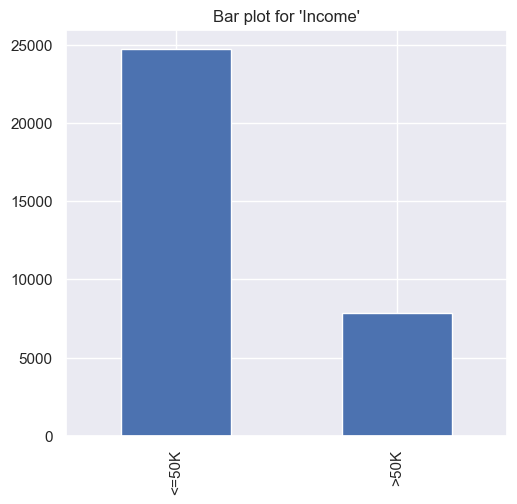

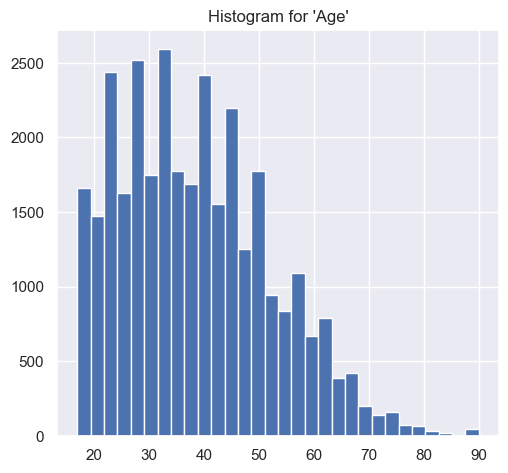

In [244]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
sns.set(rc={'figure.figsize':(5.7,5.27)})

# load the dataset
df = pd.read_csv("datasetP.csv")

# Study qualitative characters

# Frequency table for "Sex"
sex_counts = df['sex'].value_counts()
print("Frequency table for 'Sex':")
print(sex_counts)

# Bar plot for "Income"
income_counts = df['income'].value_counts()
income_counts.plot.bar()
plt.title("Bar plot for 'Income'")
plt.show()

# Study quantitative characters

# Histogram for "Age"
plt.hist(df['age'], bins=30)
plt.title("Histogram for 'Age'")
plt.show()



1. Utilisez les méthodes usuelles de pandas pour obtenir les informations de base sur ce dataset

In [245]:
f'Shape: {df.shape} Info: {df.info() } Describe: {df.describe()}'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      32561 non-null  int64  
 1   age             32561 non-null  int64  
 2   workclass       30725 non-null  float64
 3   education       32561 non-null  object 
 4   marital.status  32561 non-null  object 
 5   occupation      30718 non-null  float64
 6   relationship    32561 non-null  object 
 7   race            32561 non-null  object 
 8   sex             32561 non-null  object 
 9   capital.gain    32561 non-null  int64  
 10  capital.loss    32561 non-null  int64  
 11  hours.per.week  32561 non-null  int64  
 12  income          32561 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 3.2+ MB


'Shape: (32561, 13) Info: None Describe:          Unnamed: 0           age     workclass    occupation  capital.gain  \\\ncount  32561.000000  32561.000000  30725.000000  30718.000000  32561.000000   \nmean   16281.000000     38.581647      5.100081      7.967088   1077.648844   \nstd     9399.695394     13.640433      1.139548      4.025999   7385.292085   \nmin        1.000000     17.000000      2.000000      2.000000      0.000000   \n25%     8141.000000     28.000000      5.000000      4.000000      0.000000   \n50%    16281.000000     37.000000      5.000000      8.000000      0.000000   \n75%    24421.000000     48.000000      5.000000     11.000000      0.000000   \nmax    32561.000000     90.000000      9.000000     15.000000  99999.000000   \n\n       capital.loss  hours.per.week  \ncount  32561.000000    32561.000000  \nmean      87.303830       40.437456  \nstd      402.960219       12.347429  \nmin        0.000000        1.000000  \n25%        0.000000       40.000000  \n50

In [246]:
df.columns

Index(['Unnamed: 0', 'age', 'workclass', 'education', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'capital.gain',
       'capital.loss', 'hours.per.week', 'income'],
      dtype='object')

In [247]:
df.dtypes

Unnamed: 0          int64
age                 int64
workclass         float64
education          object
marital.status     object
occupation        float64
relationship       object
race               object
sex                object
capital.gain        int64
capital.loss        int64
hours.per.week      int64
income             object
dtype: object

2. Quantifiez les données dupliquées dans cette base de données et interprétez

In [248]:
df.duplicated().sum()


0

3. Quantifiez les données aberrantes dans cette base de données et interprétez

In [249]:

num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    if not outliers.empty:
        print(f"Colonne {col} a {len(outliers)} valeurs aberrantes")
        display(outliers)

cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    value_counts = df[col].value_counts()
    
    low_counts = value_counts[value_counts < 5]
    
    if not low_counts.empty:
        print(f"Colonne {col} a des catégories avec peu de valeurs")
        display(low_counts)

Colonne age a 143 valeurs aberrantes


,Unnamed: 0,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
0,1,90,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Female,0,4356,40,<=50K
1,2,82,5.0,HS-grad,Widowed,5.0,Not-in-family,White,Female,0,4356,18,<=50K
118,119,83,6.0,Bachelors,Married-civ-spouse,5.0,Husband,White,Male,0,2392,55,>50K
128,129,81,5.0,HS-grad,Married-civ-spouse,5.0,Husband,White,Male,0,2377,26,>50K
199,200,90,5.0,HS-grad,Never-married,9.0,Not-in-family,Black,Male,0,2206,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31939,31940,82,7.0,HS-grad,Married-civ-spouse,6.0,Husband,White,Male,0,0,20,<=50K
32305,32306,90,5.0,HS-grad,Widowed,2.0,Unmarried,White,Female,0,0,25,<=50K
32468,32469,85,5.0,Bachelors,Married-civ-spouse,5.0,Husband,White,Male,0,0,3,<=50K
32500,32501,82,NaN,HS-grad,Never-married,NaN,Not-in-family,White,Male,0,0,3,<=50K


Colonne workclass a 8029 valeurs aberrantes


,Unnamed: 0,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
7,8,74,8.0,Doctorate,Never-married,11.0,Other-relative,White,Female,0,3683,20,>50K
8,9,68,2.0,HS-grad,Divorced,11.0,Not-in-family,White,Female,0,3683,40,<=50K
11,12,38,7.0,Prof-school,Never-married,11.0,Not-in-family,White,Male,0,2824,45,>50K
28,29,37,6.0,10th,Never-married,15.0,Not-in-family,White,Male,0,2559,50,>50K
31,32,59,6.0,10th,Widowed,5.0,Unmarried,White,Female,0,2559,50,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32542,32543,45,8.0,HS-grad,Separated,2.0,Own-child,White,Female,0,0,40,<=50K
32545,32546,45,3.0,Assoc-acdm,Divorced,11.0,Unmarried,White,Female,0,0,48,<=50K
32547,32548,39,3.0,Assoc-acdm,Married-civ-spouse,2.0,Wife,White,Female,0,0,20,>50K
32550,32551,43,8.0,Some-college,Divorced,2.0,Other-relative,White,Female,0,0,40,<=50K


Colonne capital.gain a 2712 valeurs aberrantes


,Unnamed: 0,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
1519,1520,54,6.0,Prof-school,Married-civ-spouse,11.0,Husband,White,Male,99999,0,60,>50K
1520,1521,52,5.0,HS-grad,Married-civ-spouse,5.0,Husband,Asian-Pac-Islander,Male,99999,0,40,>50K
1521,1522,53,6.0,HS-grad,Married-civ-spouse,13.0,Husband,White,Male,99999,0,40,>50K
1522,1523,52,5.0,Bachelors,Married-civ-spouse,5.0,Husband,White,Male,99999,0,50,>50K
1523,1524,46,5.0,Prof-school,Married-civ-spouse,11.0,Husband,White,Male,99999,0,60,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,4227,20,5.0,9th,Never-married,2.0,Unmarried,Black,Female,114,0,20,<=50K
4227,4228,39,5.0,Some-college,Divorced,2.0,Unmarried,White,Female,114,0,45,<=50K
4228,4229,33,5.0,9th,Divorced,4.0,Unmarried,White,Male,114,0,55,<=50K
4229,4230,38,5.0,10th,Widowed,15.0,Unmarried,Black,Male,114,0,40,<=50K


Colonne capital.loss a 1519 valeurs aberrantes


,Unnamed: 0,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
0,1,90,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Female,0,4356,40,<=50K
1,2,82,5.0,HS-grad,Widowed,5.0,Not-in-family,White,Female,0,4356,18,<=50K
2,3,66,NaN,Some-college,Widowed,NaN,Unmarried,Black,Female,0,4356,40,<=50K
3,4,54,5.0,7th-8th,Divorced,8.0,Unmarried,White,Female,0,3900,40,<=50K
4,5,41,5.0,Some-college,Separated,11.0,Own-child,White,Female,0,3900,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514,1515,37,5.0,Masters,Divorced,5.0,Unmarried,White,Female,0,213,45,<=50K
1515,1516,38,5.0,Bachelors,Divorced,2.0,Unmarried,Asian-Pac-Islander,Female,0,213,40,<=50K
1516,1517,40,5.0,Some-college,Divorced,14.0,Unmarried,White,Female,0,213,40,<=50K
1517,1518,36,5.0,Bachelors,Divorced,11.0,Unmarried,Black,Female,0,213,40,<=50K


Colonne hours.per.week a 9008 valeurs aberrantes


,Unnamed: 0,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
1,2,82,5.0,HS-grad,Widowed,5.0,Not-in-family,White,Female,0,4356,18,<=50K
7,8,74,8.0,Doctorate,Never-married,11.0,Other-relative,White,Female,0,3683,20,>50K
9,10,41,5.0,Some-college,Never-married,4.0,Unmarried,White,Male,0,3004,60,>50K
12,13,52,5.0,Bachelors,Widowed,9.0,Not-in-family,White,Female,0,2824,20,>50K
13,14,32,5.0,Masters,Separated,5.0,Not-in-family,White,Male,0,2824,55,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32544,32545,72,NaN,HS-grad,Married-civ-spouse,NaN,Husband,White,Male,0,0,25,<=50K
32546,32547,31,5.0,Masters,Divorced,9.0,Not-in-family,Other,Female,0,0,30,<=50K
32547,32548,39,3.0,Assoc-acdm,Married-civ-spouse,2.0,Wife,White,Female,0,0,20,>50K
32554,32555,32,5.0,Masters,Never-married,14.0,Not-in-family,Asian-Pac-Islander,Male,0,0,11,<=50K


In [250]:
import pandas as pd

# quantifier les valeurs manquantes
missing_values = df.isna().sum()
print("Valeurs manquantes par colonne:")
print(missing_values)

# imputation des valeurs manquantes par la valeur la plus fréquente
for col in df.columns:
    if df[col].isna().sum() > 0:
        most_frequent = df[col].value_counts().idxmax()
        df[col].fillna(most_frequent, inplace=True)

# vérifier que les données manquantes ont été imputées
missing_values = df.isna().sum()
print("Valeurs manquantes par colonne après imputation:")
print(missing_values)

Valeurs manquantes par colonne:
Unnamed: 0           0
age                  0
workclass         1836
education            0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
income               0
dtype: int64
Valeurs manquantes par colonne après imputation:
Unnamed: 0        0
age               0
workclass         0
education         0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
income            0
dtype: int64


In [251]:
# grouper les données par revenu
grouped = df.groupby("income")

# calculer la moyenne d'âge par groupe
mean_age = grouped["age"].mean()
print("Moyenne d'âge en fonction des revenus:")
print(mean_age)

Moyenne d'âge en fonction des revenus:
income
<=50K    36.783738
>50K     44.249841
Name: age, dtype: float64


In [252]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})
df['sex'] = df['sex'].map({'Female': 0, 'Male': 1})

<AxesSubplot: xlabel='sex', ylabel='income'>

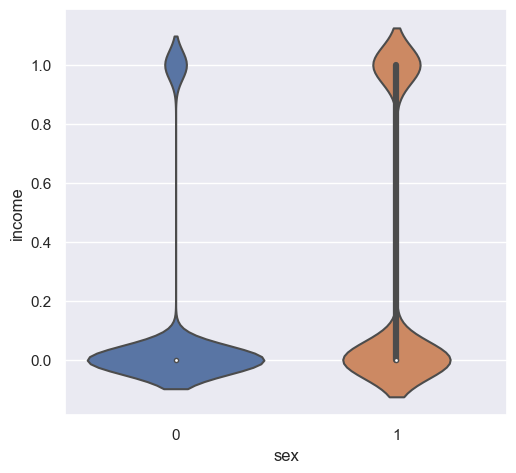

In [254]:
sns.violinplot(x="sex", y= "income", data=df, labels=['Female', 'Male'])

In [255]:
contingency_table = pd.crosstab(df['income'], df['sex'], margins=True)
contingency_table

sex,0,1,All
income,,,
0,9592,15128,24720
1,1179,6662,7841
All,10771,21790,32561


In [256]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table.iloc[:-1,:-1])
print(f"p-value: {p}")

p-value: 0.0


Si la valeur p obtenue à partir du test du chi-deux est égale à 0, cela signifie qu'il existe une association statistiquement significative entre les variables "income" et "sexe". En d'autres termes, la variable "sexe" peut être considérée comme un facteur influençant la variable "income". Il est important de noter que la seule existence d'une association ne signifie pas nécessairement une causalité. Il est donc important d'analyser les données plus en profondeur pour mieux comprendre les relations entre les variables.

In [257]:
df['age_binned'] = pd.cut(df['age'], bins=[18, 30, 45, 60, 100], labels=['18-30', '31-45', '46-60', '61-100'])

In [258]:
contingency_table = pd.crosstab(df['income'], df['age_binned'], margins=True)
contingency_table

age_binned,18-30,31-45,46-60,61-100,All
income,,,,,
0,8945,8565,4484,1781,23775
1,682,3797,2811,551,7841
All,9627,12362,7295,2332,31616


In [259]:

chi2, p, dof, expected = chi2_contingency(contingency_table.iloc[:-1,:-1])
print(f"p-value: {p}")

p-value: 0.0


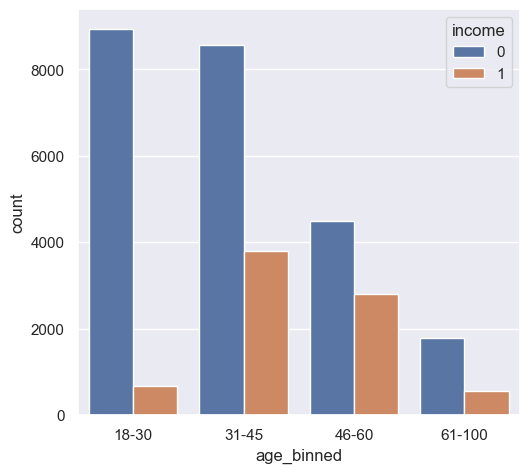

In [260]:
sns.countplot(x='age_binned', hue='income', data=df)
plt.show()

There is a statistically significant association between age and capital loss.


<AxesSubplot: xlabel='capital.loss', ylabel='age'>

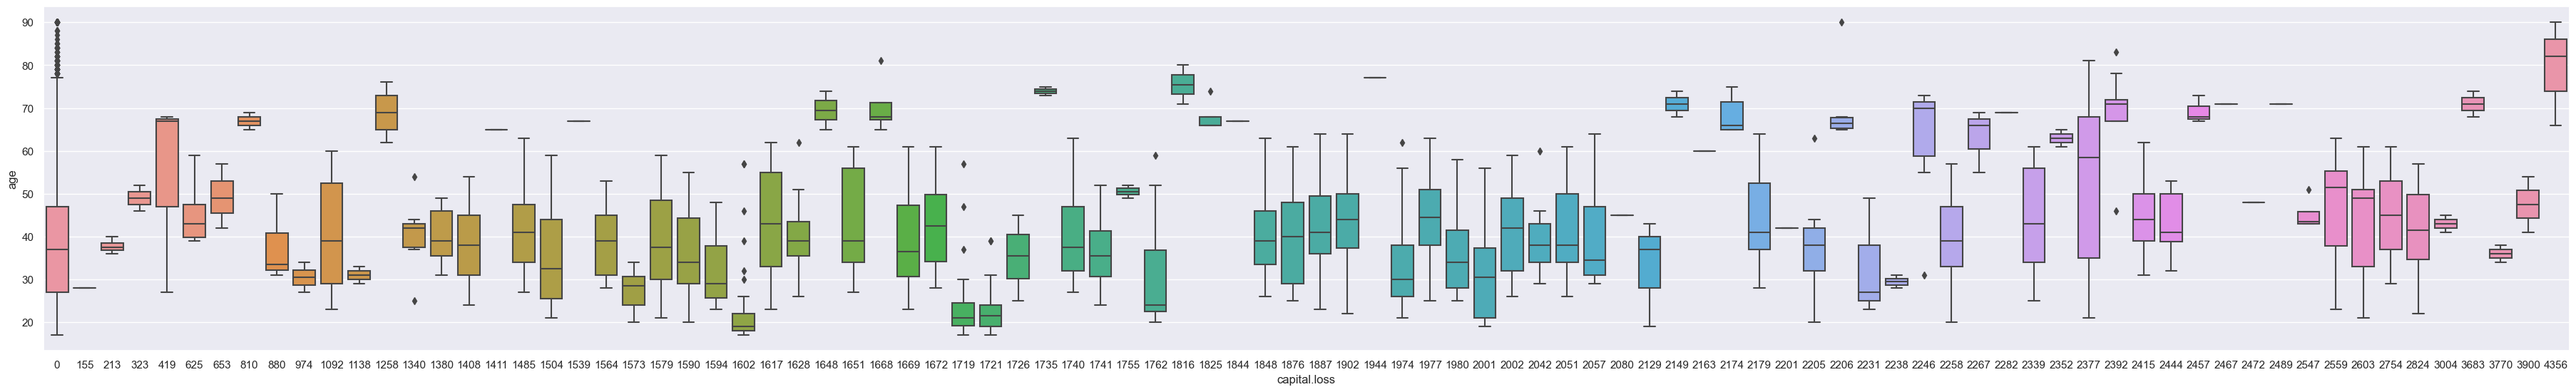

In [261]:
df_ct = pd.crosstab(df['age'], df['capital.loss'])

chi2, p, dof, expected = chi2_contingency(df_ct)

if p < 0.05:
    print("There is a statistically significant association between age and capital loss.")
else:
    print("There is no statistically significant association between age and capital loss.")
    
sns.set(rc={'figure.figsize':(45.7,6.27)})

sns.boxplot(x="capital.loss", y="age", data=df)


In [262]:

df_scaled = pd.get_dummies(df, columns=["workclass", "education", "marital.status", "occupation", "relationship", "race", "sex"])


In [263]:
df_scaled = df_scaled.drop(["age_binned"], axis = 1)

In [264]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Split the dataset into training and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Define the features and target variables
features = ["age", "capital.gain", "capital.loss", "hours.per.week"]
target = "income"

# Extract the feature and target arrays from the training set
X_train = train_df[features].values
y_train = train_df[target].values

# Extract the feature and target arrays from the test set
X_test = test_df[features].values
y_test = test_df[target].values

# Initialize the kNN model
knn = KNeighborsClassifier()

# Train the kNN model on the training set
knn.fit(X_train, y_train)

# Predict the target values on the test set
y_test_pred = knn.predict(X_test)


In [265]:
print("Accuracy on training data:", knn.score(X_train, y_train))
print("Accuracy on test data:", knn.score(X_test, y_test))



Accuracy on training data: 0.8236332923832924
Accuracy on test data: 0.8163672654690619


In [268]:
verif = pd.DataFrame({"expected": y_test, "predicted": y_test_pred })

In [272]:
verif.sample(20)


,expected,predicted
3777,0,0
2532,0,1
757,0,0
1717,0,0
972,1,1
4568,1,0
4674,0,0
5497,1,0
4629,0,1
673,0,0


In [270]:
knn = KNeighborsClassifier(2)

knn.fit(X_train, y_train)

y_val_pred = knn.predict(X_train)

y_test_pred = knn.predict(X_test)

print("Accuracy on training data:", knn.score(X_train, y_train))
print("Accuracy on test data:", knn.score(X_test, y_test))

Accuracy on training data: 0.8256296068796068
Accuracy on test data: 0.8211269768155995


In [273]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

# Initialize the classifier
knn = KNeighborsClassifier()

# Conduct a grid search on the parameters
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}
Best score:  0.821752112927242


In [274]:
from sklearn import svm
svc = svm.SVC()
svc.fit(X_train, y_train)

SVC()

In [275]:
print("Accuracy on training data:", svc.score(X_train, y_train))
print("Accuracy on test data:", svc.score(X_test, y_test))

Accuracy on training data: 0.8021345208845209
Accuracy on test data: 0.8031629049593122


Une idée d'application pour un modèle de classification comme kNN pourrait être de prédire la catégorie de revenu d'une personne en fonction de ses caractéristiques démographiques, telles que son âge, son niveau d'éducation et ses pertes de capital. Cette information pourrait être utilisée par les entreprises pour cibler les consommateurs en fonction de leur niveau de revenu, ou par les gouvernements pour évaluer les besoins en matière de services sociaux pour les différentes catégories de revenu.